In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


file_path = '/content/Diyabet-Veri Seti.csv'
df = pd.read_csv(file_path)


print(df.head())


print(df.info())


print(df.describe())


   pregnant  plasma  blood_pressure   skinfold_thickness   insulin   BMI  \
0         6     148              72                   35         0  33.6   
1         1      85              66                   29         0  26.6   
2         8     183              64                    0         0  23.3   
3         1      89              66                   23        94  28.1   
4         0     137              40                   35       168  43.1   

    diabetes_pedigree_function  age  class  
0                        0.627   50      1  
1                        0.351   31      0  
2                        0.672   32      1  
3                        0.167   21      0  
4                        2.288   33      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pregnant                     768 non-null    int

In [17]:

print(df.isnull().sum())


X = df.drop(columns=['class'])
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


pregnant                       0
plasma                         0
blood_pressure                 0
 skinfold_thickness            0
 insulin                       0
 BMI                           0
 diabetes_pedigree_function    0
age                            0
class                          0
dtype: int64


In [18]:

model = Sequential()


model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))


model.add(Dense(8, activation='relu'))


model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5868 - loss: 0.7147 - val_accuracy: 0.6098 - val_loss: 0.6951
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6804 - loss: 0.6620 - val_accuracy: 0.6341 - val_loss: 0.6610
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6656 - loss: 0.6069 - val_accuracy: 0.6179 - val_loss: 0.6237
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6993 - loss: 0.5589 - val_accuracy: 0.6341 - val_loss: 0.5952
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7124 - loss: 0.5327 - val_accuracy: 0.6341 - val_loss: 0.5811
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7279 - loss: 0.5127 - val_accuracy: 0.6504 - val_loss: 0.5638
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7161 - loss: 0.5326 - val_accuracy: 0.7073 - val_loss: 0.5473
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7385 - loss: 0.4776 - val_accuracy: 0.7398 - v

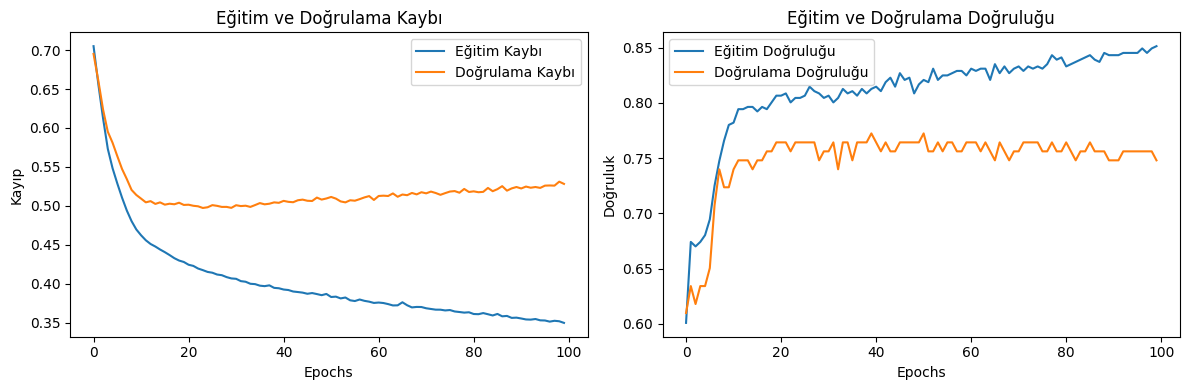

In [19]:

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()

plt.tight_layout()
plt.show()


In [20]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Doğruluğu: {test_accuracy:.4f}')


Test Doğruluğu: 0.7662


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


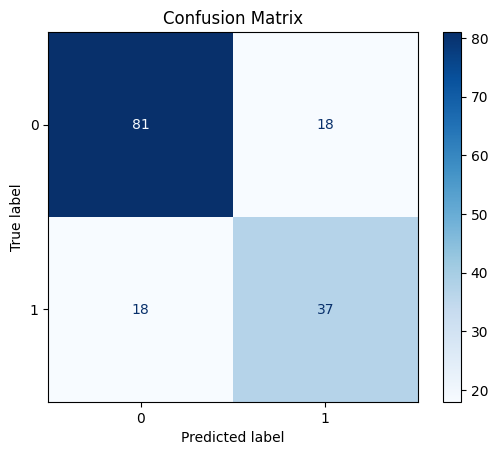

Confusion Matrix:
 [[81 18]
 [18 37]]


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Sigmoid çıktıyı binary sınıfa dönüştürme (0 veya 1)


cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


print("Confusion Matrix:\n", cm)


In [25]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score

# Test seti üzerinde tahminler yapma
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Tahminleri 0 veya 1 sınıfına dönüştürme

# Accuracy, F1, Recall, Precision gibi metrikleri hesaplama
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

# Tek tek metrikler olarak da hesaplayabiliriz:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)




5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

